In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_continuous
%store -r Y_relative_footsteps_continuous
print(X_relative_footsteps_continuous.shape)
print(Y_relative_footsteps_continuous.shape)

(38598, 28)
(38598, 8)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where RL swings
idxs = np.where(X_relative_footsteps_continuous[:, 23] == 1)[0]
X_relative_footsteps_continuous_RL_swing = X_relative_footsteps_continuous[idxs]
Y_relative_footsteps_continuous_RL_swing = Y_relative_footsteps_continuous[idxs]

## Predict RL foot -> x

In [8]:
X_relative_footsteps_continuous_RL_swing[0, :]

array([ 0.1       ,  0.        ,  0.        ,  0.01715523,  0.02680482,
        0.05156133, -0.00914702,  0.0315145 , -0.02258525,  0.23698767,
        0.17026876, -0.40873471,  0.23344301, -0.16811552, -0.40935065,
       -0.24342878,  0.16518854, -0.41243429, -0.24083982, -0.16411242,
       -0.41243872,  0.        ,  1.        ,  1.        ,  0.        ,
        0.1       ,  0.        ,  0.        ])

In [9]:
Y_relative_footsteps_continuous_RL_swing[0, :]

array([ 0.22567786,  0.17359778,  0.23985769, -0.16623835, -0.23764378,
        0.16585226, -0.25201704, -0.15896871])

### Linear Regression

In [18]:
# Input
X = np.hstack((X_relative_footsteps_continuous_RL_swing[:, :3], # motion command
               X_relative_footsteps_continuous_RL_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_RL_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_RL_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_RL_swing[:, 18:20])) # RR (x,y) position 

# Target
Y = np.array([Y_relative_footsteps_continuous_RL_swing[:, 4]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rl_relative_swinging_x = LinearRegression()

# Fit the model
model_rl_relative_swinging_x.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_swinging_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9945149350675752
RMSE:  0.0021157863429782297
The lowest error is:  6.854765154384879e-07
The highest error is:  0.01916654300894116
The avg. error is:  0.0015234640166104888


In [19]:
model_rl_relative_swinging_x.coef_

array([[ 0.09666263, -0.01038443,  0.01841709,  0.01569752,  0.1877184 ,
        -0.00243372,  0.09683732,  0.47894133,  0.05016164,  0.2286775 ,
         0.00177181]])

In [20]:
model_rl_relative_swinging_x.intercept_

array([-0.10110262])

Text(0, 0.5, 'Predictions')

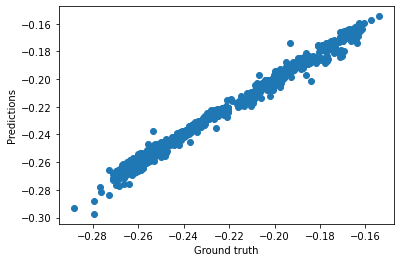

In [21]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [22]:
#%store model_rl_relative_swinging_x

In [23]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [24]:
# Save model
#joblib.dump(model_rl_relative_swinging_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_swinging_x.sav")

### Predict RL foot -> y

In [26]:
# Input
X = np.hstack((X_relative_footsteps_continuous_RL_swing[:, :3], # motion command
               X_relative_footsteps_continuous_RL_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_RL_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_RL_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_RL_swing[:, 18:20])) # RR (x,y) position 

# Target
Y = np.array([Y_relative_footsteps_continuous_RL_swing[:, 5]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rl_relative_swinging_y = LinearRegression()

# Fit the model
model_rl_relative_swinging_y.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_swinging_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9987330665995955
RMSE:  0.0019224482291877712
The lowest error is:  1.8863129866431017e-07
The highest error is:  0.014371383172100113
The avg. error is:  0.001257234540098065


In [27]:
model_rl_relative_swinging_y.coef_

array([[-0.00271595,  0.11651606,  0.09669578,  0.075615  ,  0.10954938,
        -0.04544669, -0.0032865 , -0.0505534 ,  0.50989102, -0.10286815,
        -0.09419408]])

In [28]:
model_rl_relative_swinging_y.intercept_

array([0.00378027])

Text(0, 0.5, 'Predictions')

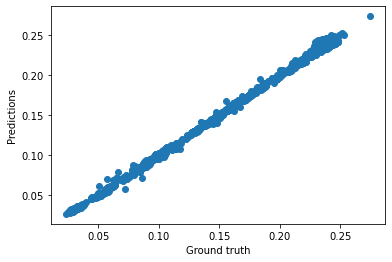

In [29]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [22]:
#%store model_rl_relative_swinging_y

In [20]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [21]:
# Save model
#joblib.dump(model_rl_relative_swinging_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_swinging_y.sav")